# Gradient Visualization with Matplotlib
### Presented By Eduonix

In this short project, we will visualize the gradients for a 2-Dimensional equation. Feel free to try your own equation! 

This project is primarily focused on understanding gradients; however, we will also learn some helpful programming skills along the way. For example, we will be working with meshgrids, which are useful whenever you want to display information associated with different points on an array. Furthermore, learning to visualize information using matplotlib is a valuable skill. In this project, we will utilize both a quiver plot and a pcolor plot. 

Let's get started!

In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print 'Python: {}'.format(sys.version)
print 'NumPy: {}'.format(np.__version__)
print 'Matplotlib: {}'.format(matplotlib.__version__)

Python: 2.7.13 |Continuum Analytics, Inc.| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]
NumPy: 1.14.1
Matplotlib: 2.1.0


The above cells import the libraries and packages we will be using. It's always a good idea to print the version numbers of the libraries you are using. This ensures the libraries have been installed correctly and improves reproducibility. 

Using NumPy, we can generate a meshgrid of x and y points. This meshgrid is a large 2D array that we will use for our plots.  Furthermore, let's also define a function to plot.  The z value at each x,y point on the meshgrid will be calculated with this function

In [3]:
# generate 2D meshgrid
nx, ny = (100, 100)

x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)

xv, yv = np.meshgrid(x,y)

# define function to plot
def f(x,y):
    return x * (y**2)

# calculate Z value for each X,Y point
z = f(xv, yv)

Now that we have our meshgrid and have calculated f(x,y) for all points on the meshgrid, we can visualize the results! The z points on the graph will be represented using a colormap. 

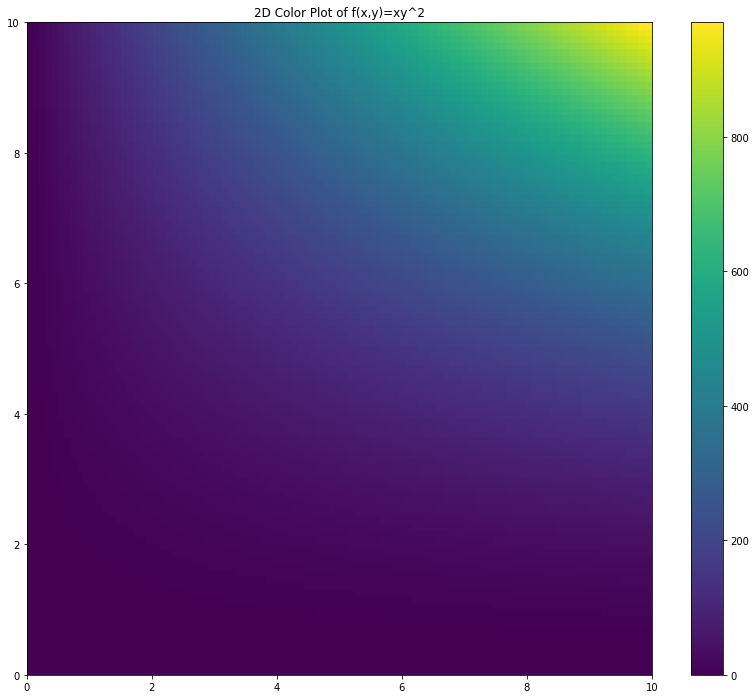

In [4]:
# Make a Color plot to display the data
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.title('2D Color Plot of f(x,y)=xy^2')
plt.colorbar()
plt.show()

Looks good! Now that we have our plot, let's add the gradient. Instead of calculating the gradient at every single point on this graph, we will define a new meshgrid with fewer points.  The gradient can then be calculated at each point using NumPy's gradient() command.  Be careful though, since NumPy returns an array, it will be in row, column format instead of x, y format.

In [5]:
# generate 2D meshgrid for Gradient
nx, ny = (10, 10)
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
xg, yg = np.meshgrid(x,y)

# calculate the gradient of f(x,y)
# Note: numpy returns answer in rows (y), columns (x) format
Gy, Gx = np.gradient(f(xg, yg))

Visualize the gradient using matplotlib's quiver plot. The direction of the gradient is represented by the angle of the arrow, while the magnitude is represented by the length of the arrow. 

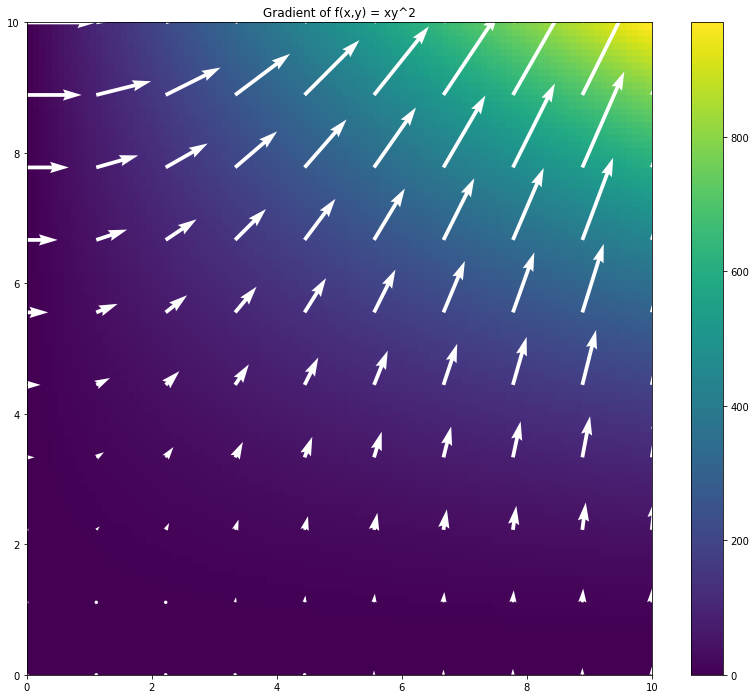

In [6]:
# Make a Color plot to display the data
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.quiver(xg, yg, Gx, Gy, scale = 1000, color = 'w')
plt.title('Gradient of f(x,y) = xy^2')
plt.show()

The plot above looks perfect! The arrows are pointing in the direction of maximum increase and their magnitude is equal to the slope at these locations. But how do we know that the gradient was calculated correctly? We can ensure that NumPy is calculating it correctly by finding the partial derivatives.  The gradient is simply an array of partial derivatives; as a result, we should be able to reproduce these results by calculating the following:

$\nabla f(x,y) = \begin{bmatrix} \frac{d}{dx}f(x,y) && \frac{d}{dy}f(x,y) \end{bmatrix}$

For the function $f(x,y) = xy^2$, the partials will be the following:

$\nabla f(x,y) = \begin{bmatrix}y^2&&2xy\end{bmatrix}$

By defining our own functions, we can easily calculate the x and y components of the gradient at every point on the meshgrid.

In [7]:
# calculate the gradient of f(x,y) = xy^2
def ddx(x,y):
    return y ** 2

def ddy(x,y):
    return (2 * y * x)

Gx = ddx(xg,yg)
Gy = ddy(xg,yg)

Time to visualize the results!

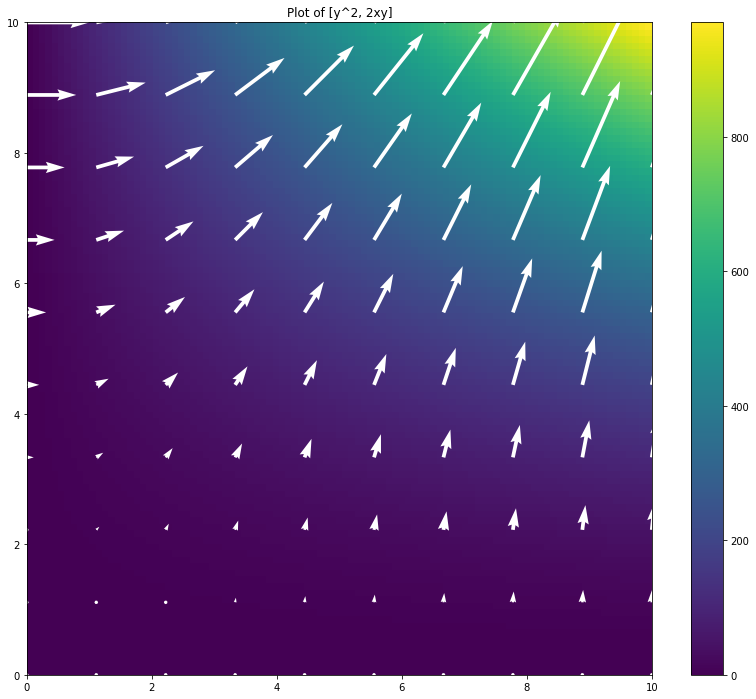

In [8]:
# Make a Color plot to display the data
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.quiver(xg, yg, Gx, Gy, scale = 1000, color = 'w')
plt.title('Plot of [y^2, 2xy]')
plt.show()